# QCTO - Workplace Module

### Project Title: Regional Vegetable Price Analysis: Trends and Seasonality
#### Done By: Abel Masotla

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

## **Github Link**

https://github.com/Masotlaabel/QCTO-Project

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>


**Purpose:**  
This project aims to analyze vegetable prices across different regions using data from an authorized source ([Agmarknet](https://agmarknet.gov.in/)). The main objective is to explore pricing trends, identify patterns, and understand the factors influencing price fluctuations over time.

**Problem Domain:**  
Vegetable prices are highly variable, influenced by several factors such as regional availability, seasonality, weather conditions, and market demand. These fluctuations can impact both consumers and producers, making it crucial to analyze the trends to predict future price changes and minimize uncertainties.

The project seeks to address the following key questions:
- What are the **average price trends** for specific vegetables across different regions over time?
- Are there any **patterns of price volatility** or sudden changes that occur frequently?
- How does **seasonality** influence the prices of various vegetables, and can it be predicted?
- What role do **regional factors** play in pricing differences across different geographical areas?

**Significance:**  
Understanding vegetable pricing trends can offer insights to:
- **Consumers**, by helping them plan their purchases based on expected price changes.
- **Farmers**, by enabling them to optimize their planting and selling strategies to maximize profits.
- **Policymakers**, by providing data to stabilize prices and avoid extreme volatility in the market.


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [174]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
The dataset used in this project is sourced from Kaggle, which cites Agmarknet ([Agmarknet](https://agmarknet.gov.in/)) as the original source for the vegetable price data. The dataset provides extensive details on vegetable prices across various regions in India, collected over a specified time period.

**Data Characteristics:**
- **Size:** The dataset contains thousands of rows, each representing a vegetable price record.
- **Scope:** Prices of various vegetables in multiple regions across different time periods.
- **Data Types:** 
  - Categorical (vegetable names, region)
  - Numerical (price)
  - Temporal (dates)
---

In [175]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [176]:
# Load the CSV file
df = pd.read_csv("prices.csv")

# Display the first few rows
df.head(100
        )


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
95,07-05-2023,24.5,16,10.0,20,25,90,70,10,30.0,15
96,08-05-2023,22.0,16,10.0,20,20,90,70,10,35.0,30
97,09-05-2023,20.0,16,10.0,20,20,90,60,10,40.0,30
98,10-05-2023,20.0,16,10.0,20,20,90,60,10,35.0,25


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [178]:
# Convert 'Price Dates' to datetime
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())
df.dropna(inplace=True)  # Drop rows with missing values



# Handle outliers using the IQR method for all numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Correct errors in data types
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')
numeric_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
                   'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

# Summary of cleaned data
print(df.info())
print(df.describe())
print("Data after cleaning:")

Missing values before cleaning:
Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price Dates             178 non-null    datetime64[ns]
 1   Bhindi (Ladies finger)  178 non-null    float64       
 2   Tomato                  178 non-null    int64         
 3   Onion                   178 non-null    float64       
 4   Potato                  178 non-null    int64         
 5   Brinjal                 178 non-null    int64         
 6   Garlic                  178 non-null    int64         
 7

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


## Time Series Analysis 

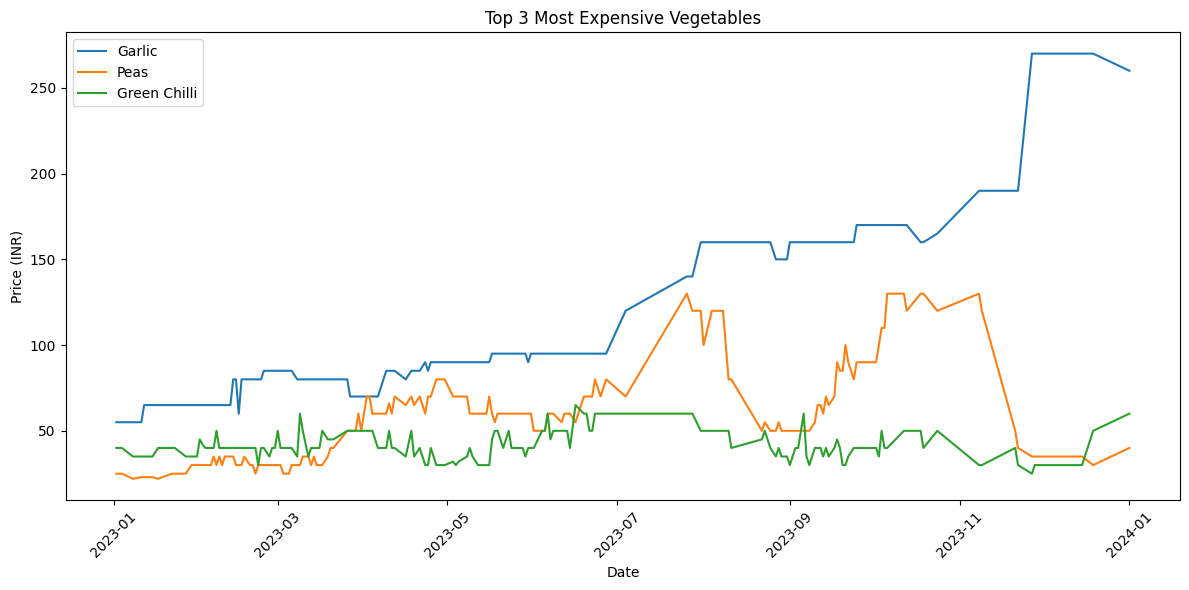

In [179]:
# Get the list of vegetable columns
vegetables = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
              'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']

# Calculate the top 3 vegetables with the highest average price
top_3_vegetables = df[vegetables].mean().nlargest(3).index

# Plot the prices of the top 3 vegetables over time
plt.figure(figsize=(12, 6))

for veg in top_3_vegetables:
    plt.plot(df['Price Dates'], df[veg], label=veg)

plt.title('Top 3 Most Expensive Vegetables')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




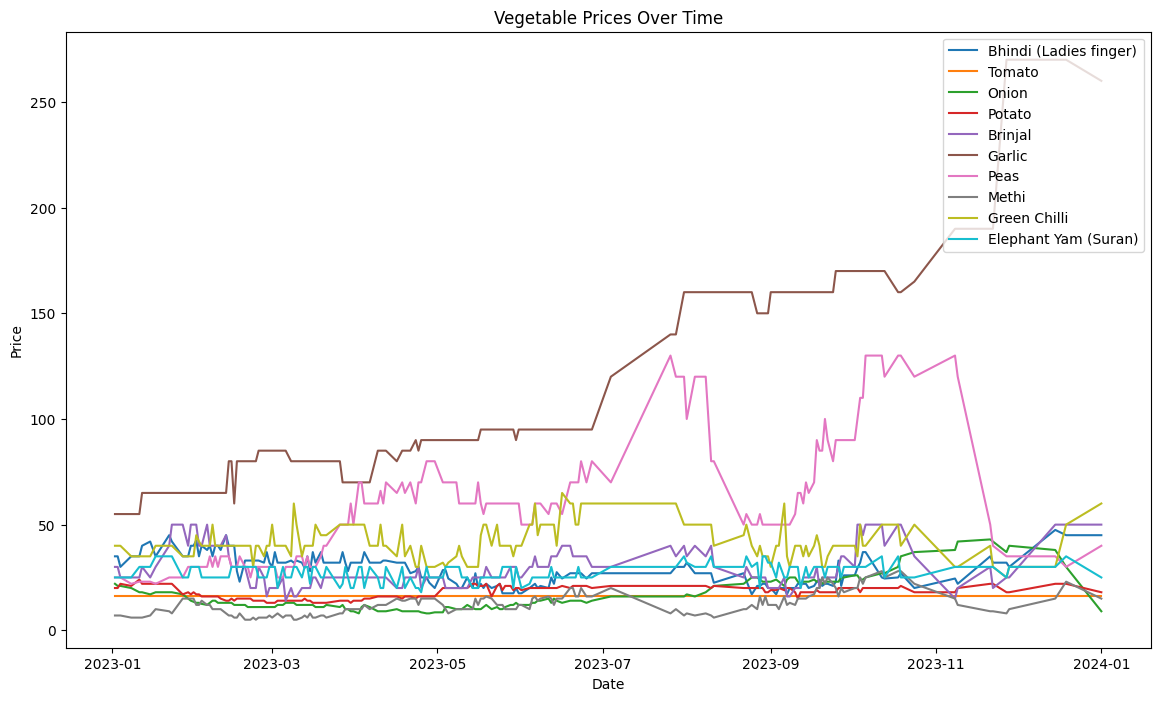

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
for vegetable in numeric_columns:
    sns.lineplot(data=df, x='Price Dates', y=vegetable, label=vegetable)

plt.title('Vegetable Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()



C:\Users\MASOT\AppData\Local\Temp\ipykernel_28300\2646191625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index, y=volatility.values, palette='viridis')


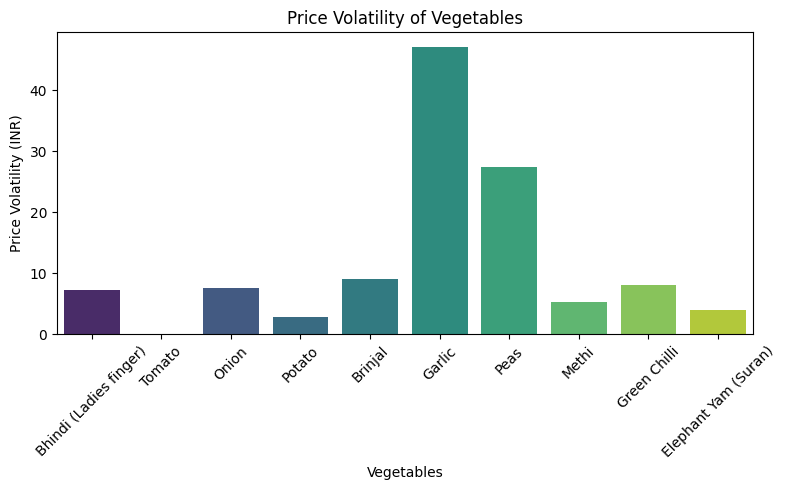

In [181]:
# Calculate the standard deviation (price volatility) for each vegetable
volatility = df[vegetables].std()

plt.figure(figsize=(8, 5))
sns.barplot(x=volatility.index, y=volatility.values, palette='viridis')
plt.title('Price Volatility of Vegetables')
plt.xlabel('Vegetables')
plt.ylabel('Price Volatility (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



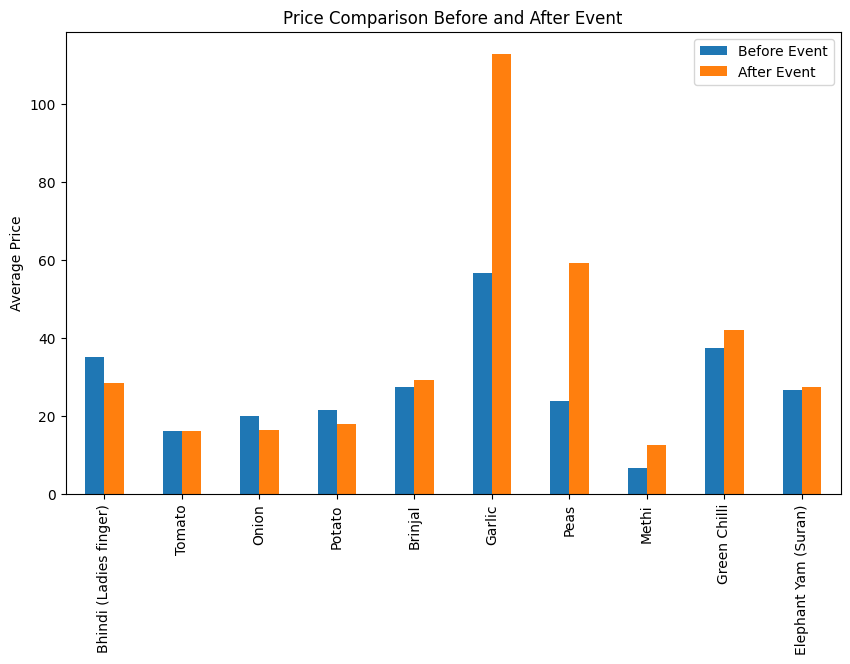

In [182]:
event_date = '2023-01-15'
before_event = df[df['Price Dates'] < event_date]
after_event = df[df['Price Dates'] >= event_date]

before_avg = before_event[numeric_columns].mean()
after_avg = after_event[numeric_columns].mean()

comparison = pd.DataFrame({'Before Event': before_avg, 'After Event': after_avg})

comparison.plot(kind='bar', figsize=(10,6))
plt.title('Price Comparison Before and After Event')
plt.ylabel('Average Price')
plt.show()


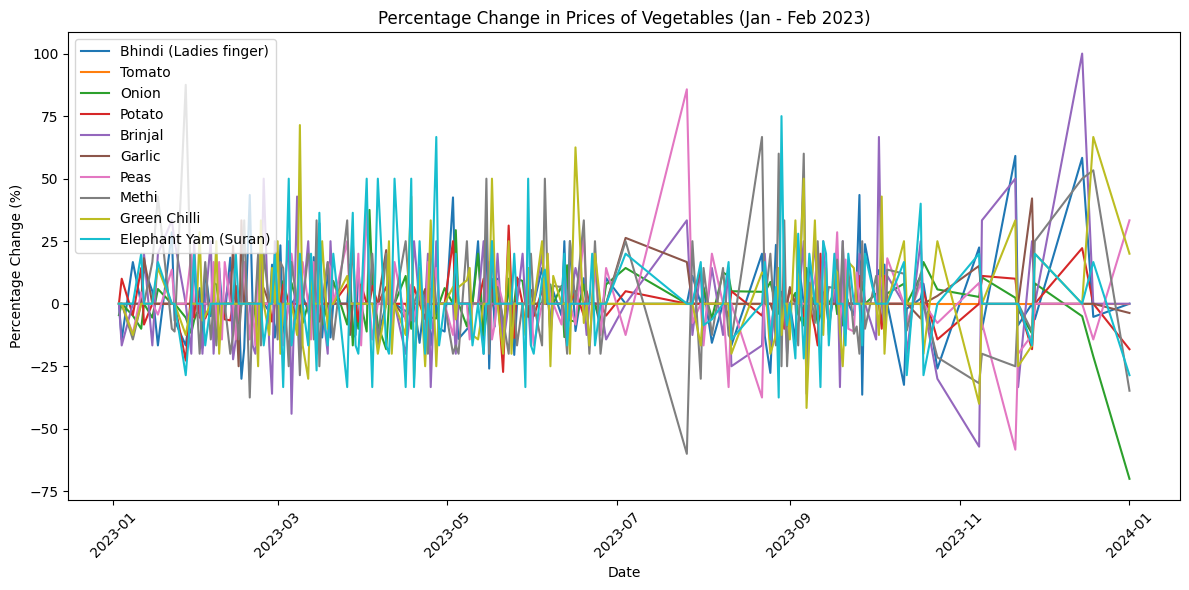

In [183]:
# Calculate the percentage change in prices
percentage_change = df[vegetables].pct_change() * 100

plt.figure(figsize=(12, 6))

# Plot the percentage change for each vegetable over time
for veg in vegetables:
    plt.plot(df['Price Dates'], percentage_change[veg], label=veg)

plt.title('Percentage Change in Prices of Vegetables (Jan - Feb 2023)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [184]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


## Moving Average for Smoothing Trend

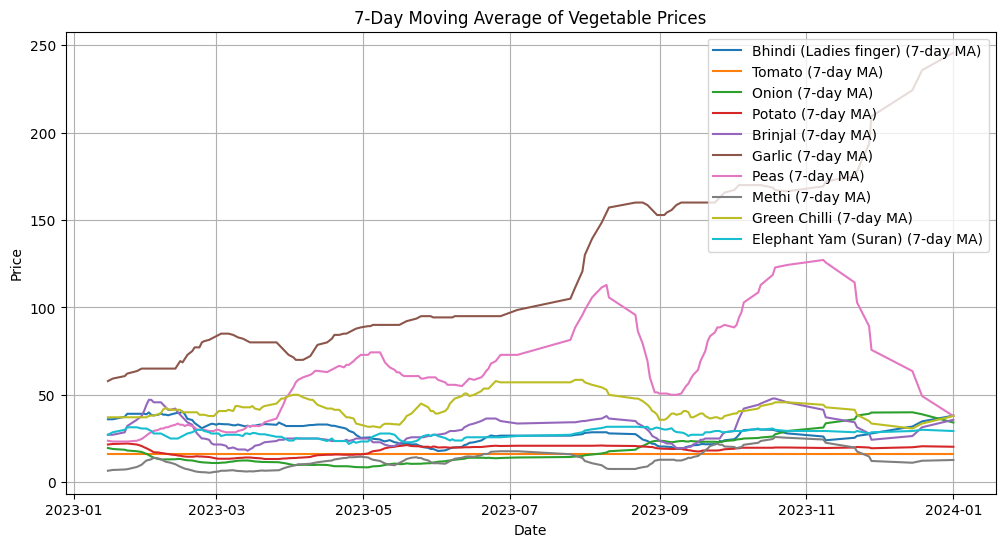

In [185]:
# Adding a 7-day moving average for each vegetable price
for column in numeric_columns:
    df[column + '_MA_7'] = df[column].rolling(window=7).mean()

# Plotting the moving averages
plt.figure(figsize=(12, 6))
for column in numeric_columns:
    plt.plot(df['Price Dates'], df[column + '_MA_7'], label=column + ' (7-day MA)')

plt.title("7-Day Moving Average of Vegetable Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

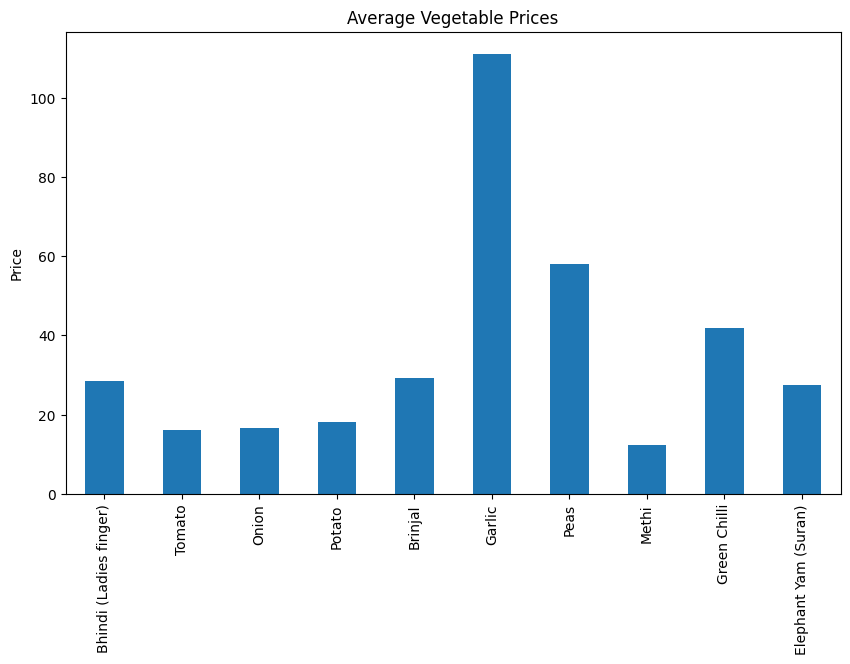

In [186]:
avg_prices = df[numeric_columns].mean()
avg_prices.plot(kind='bar', figsize=(10,6))
plt.title('Average Vegetable Prices')
plt.ylabel('Price')
plt.show()

## Correlation Analysis

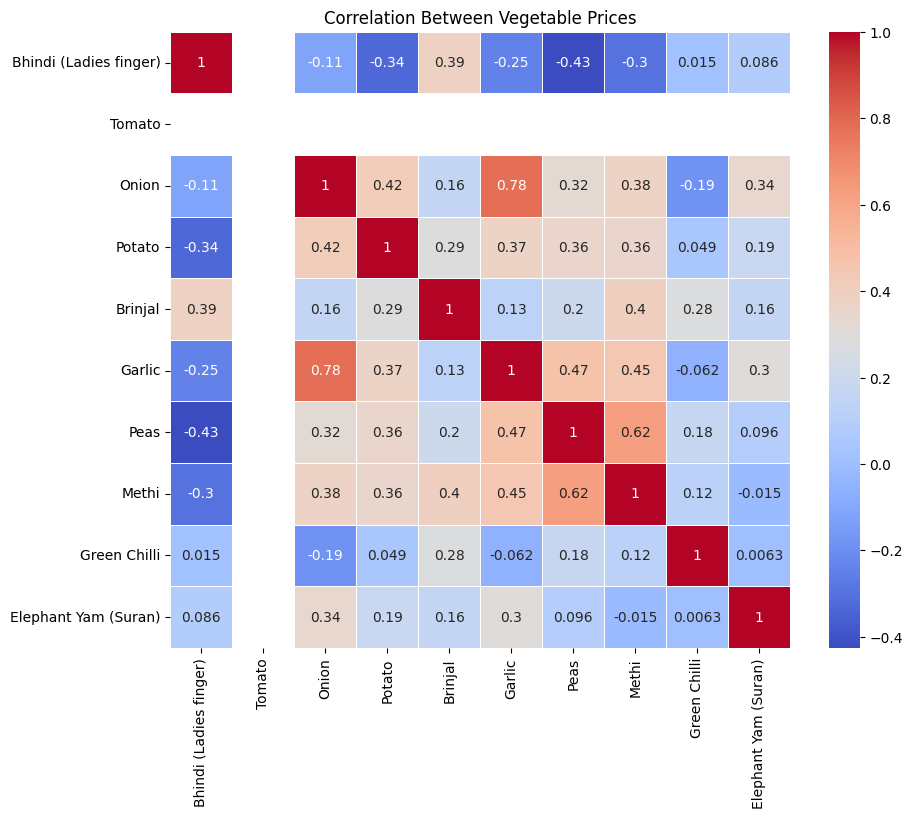

In [187]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plotting a heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Vegetable Prices")
plt.show()


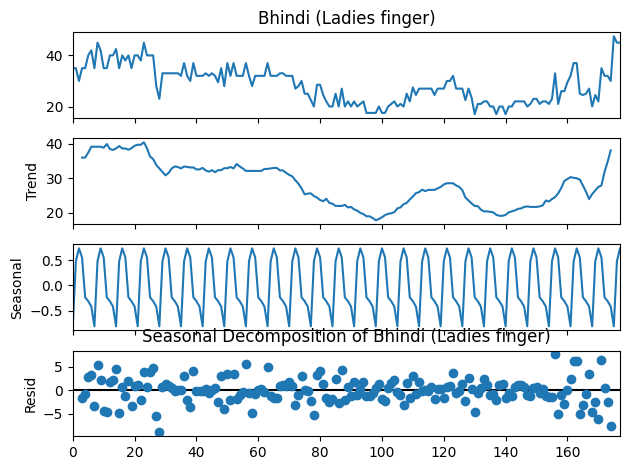

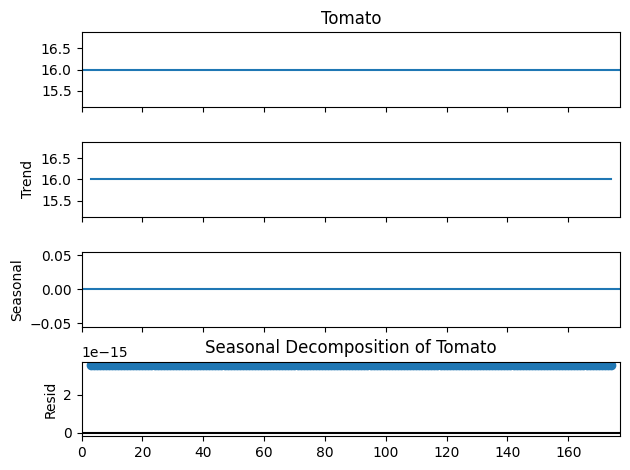

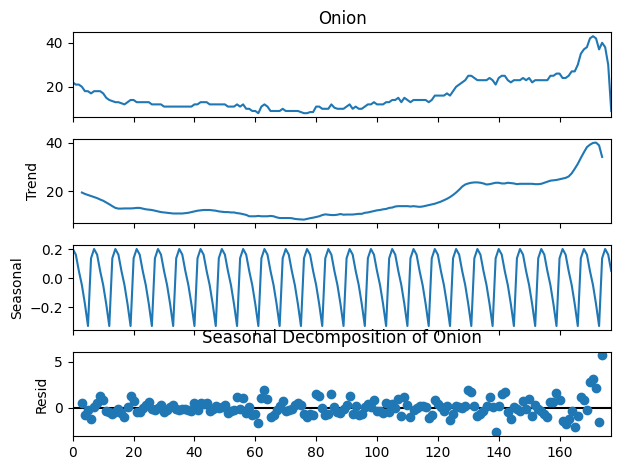

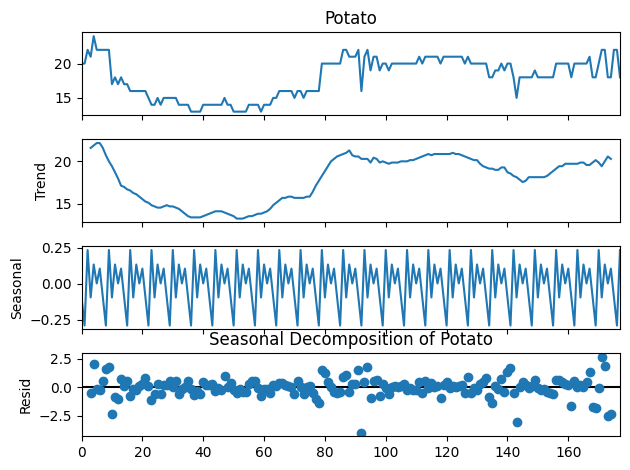

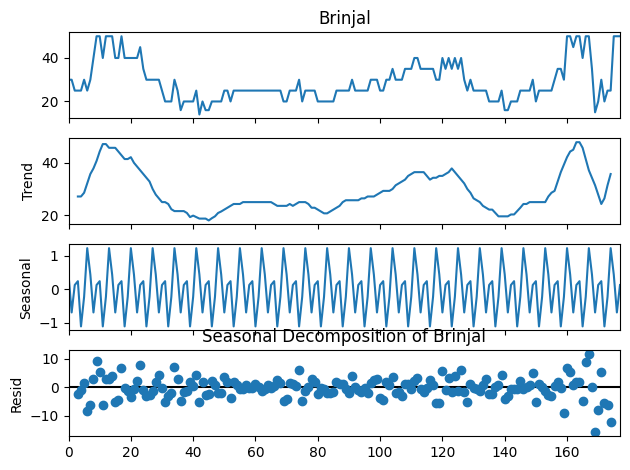

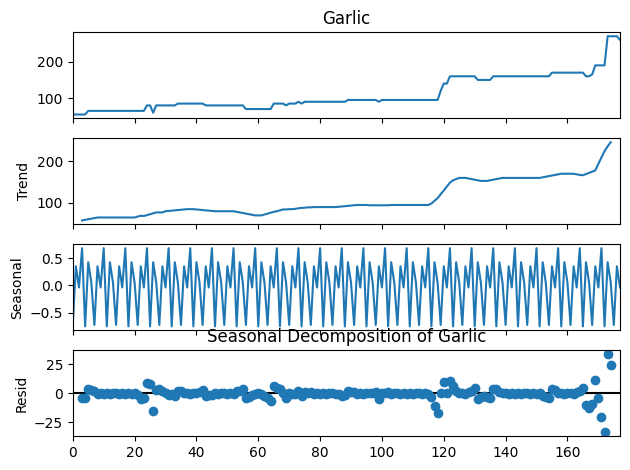

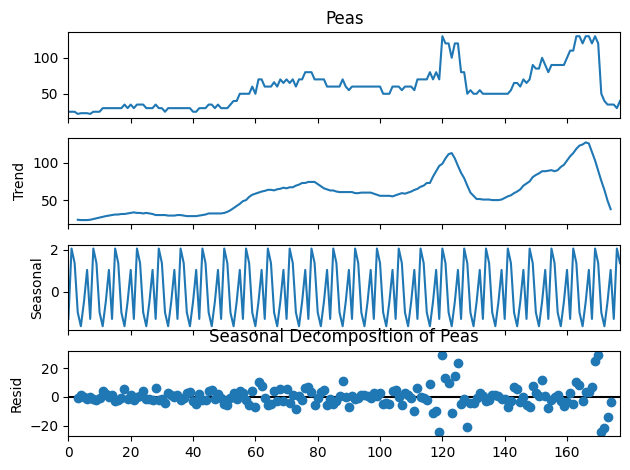

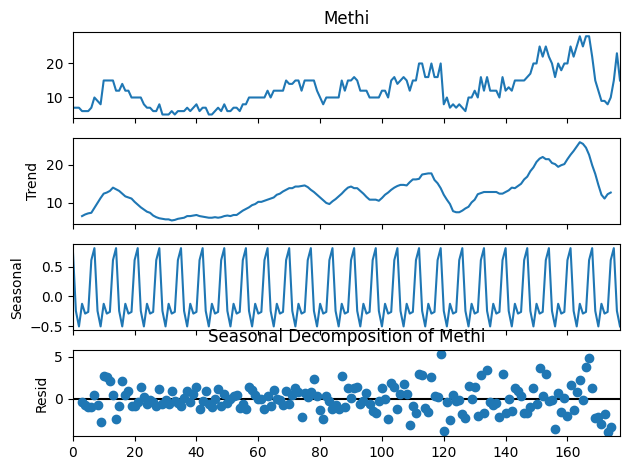

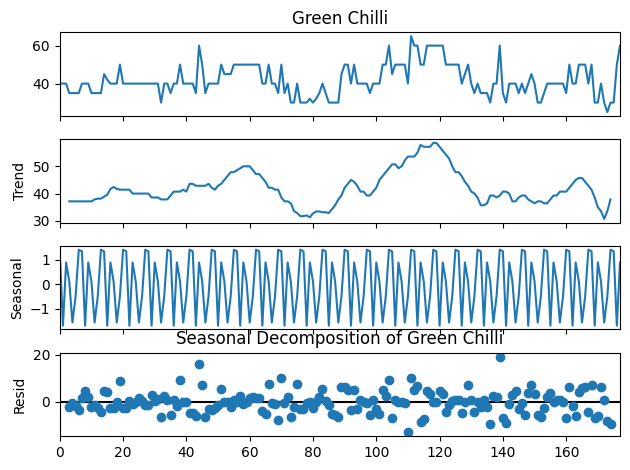

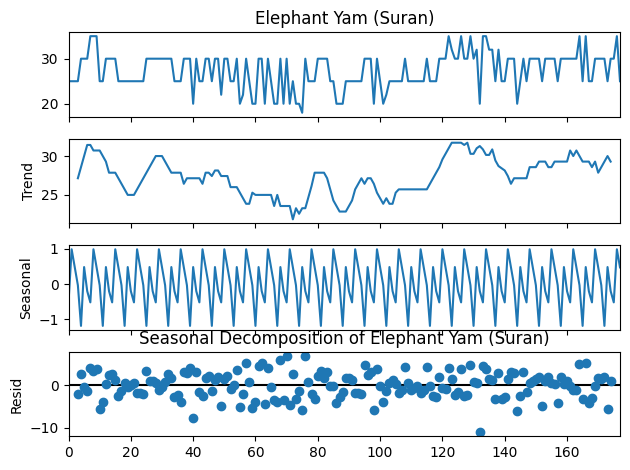

In [188]:
from statsmodels.tsa.seasonal import seasonal_decompose

for veg in vegetables:
    decomposition = seasonal_decompose(df[veg], model='additive', period=7)
    decomposition.plot()
    plt.title(f'Seasonal Decomposition of {veg}')
    plt.show()



## Boxplot for Outlier Detection

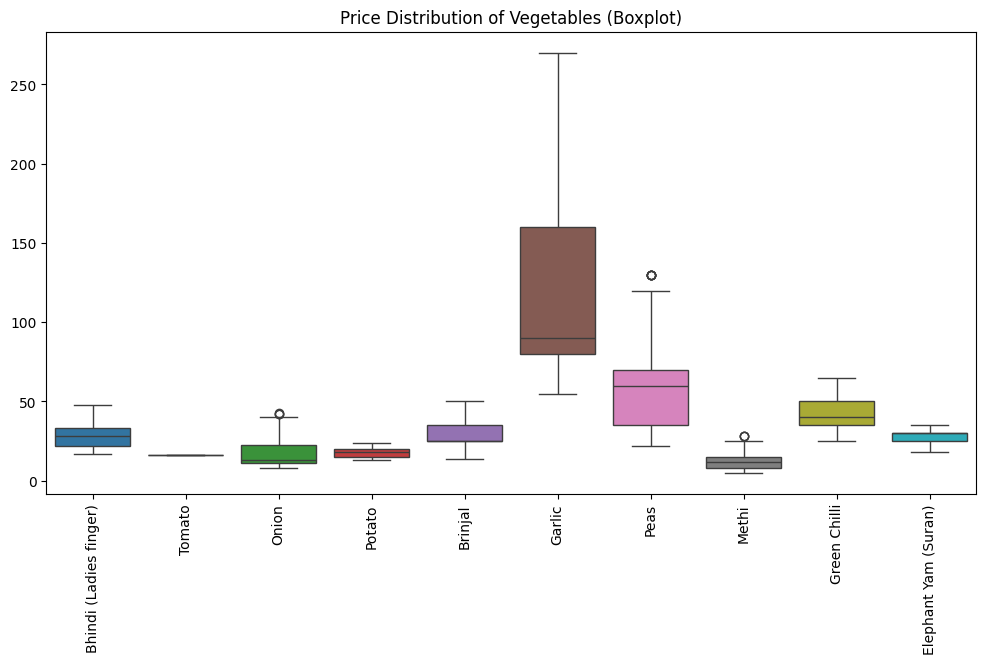

In [189]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Price Distribution of Vegetables (Boxplot)")
plt.xticks(rotation=90)
plt.show()


### ANOVA

In [190]:
from scipy import stats

# Prepare the data for ANOVA
anova_data = [df[veg].dropna() for veg in vegetables]  # Drop NaN values
f_stat, p_val = stats.f_oneway(*anova_data)
print("F-statistic:", f_stat)
print("P-value:", p_val)


F-statistic: 481.7755156738538
P-value: 0.0


In [191]:
from scipy import stats

# T-test between Bhindi and Tomato prices
t_stat, p_val = stats.ttest_ind(df['Bhindi (Ladies finger)'], df['Tomato'])
print("T-statistic for Bhindi vs Tomato:", t_stat)
print("P-value for Bhindi vs Tomato:", p_val)


T-statistic for Bhindi vs Tomato: 23.31389084246789
P-value for Bhindi vs Tomato: 1.6539350785664724e-73


c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [192]:
# Import necessary libraries
import pandas as pd

# Assuming your DataFrame is already loaded as df
vegetables = df.columns[1:]  # Get all vegetable columns

# Calculate descriptive statistics
descriptive_stats = df[vegetables].describe()
print("Descriptive Statistics for All Vegetables:\n", descriptive_stats)


Descriptive Statistics for All Vegetables:
        Bhindi (Ladies finger)  Tomato       Onion      Potato     Brinjal  \
count              178.000000   178.0  178.000000  178.000000  178.000000   
mean                28.575843    16.0   16.488764   17.988764   29.095506   
std                  7.196682     0.0    7.623921    2.864134    9.055815   
min                 17.000000    16.0    8.000000   13.000000   14.000000   
25%                 22.000000    16.0   11.000000   15.000000   25.000000   
50%                 28.000000    16.0   13.000000   18.000000   25.000000   
75%                 33.000000    16.0   22.750000   20.000000   35.000000   
max                 47.500000    16.0   43.000000   24.000000   50.000000   

           Garlic        Peas       Methi  Green Chilli  Elephant Yam (Suran)  \
count  178.000000  178.000000  178.000000    178.000000            178.000000   
mean   111.039326   58.112360   12.303371     41.859551             27.353933   
std     47.095451  

## Regression 

In [193]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [194]:
import pandas as pd
import statsmodels.api as sm

# Make sure to choose a valid independent variable
independent_variable = 'Price Dates'  # Replace with your actual variable name

# Convert to numeric if necessary (handle non-numeric values)
df[independent_variable] = pd.to_numeric(df[independent_variable], errors='coerce')

# Sample code for regression analysis on all vegetables
for veg in vegetables:
    # Prepare your independent variable (X)
    X = df[[independent_variable]]
    y = df[veg]

    # Convert y to numeric
    y = pd.to_numeric(y, errors='coerce')

    # Drop NaN values from y and corresponding rows in X
    combined_data = pd.concat([X, y], axis=1).dropna()
    X_cleaned = combined_data[[independent_variable]]
    y_cleaned = combined_data[veg]

    # Check if the dependent variable has values
    if len(y_cleaned) > 0:  # Ensure y has no NaN values
        # Add a constant to the independent variable
        X_cleaned = sm.add_constant(X_cleaned)

        # Fit the OLS model
        model = sm.OLS(y_cleaned, X_cleaned).fit()  # Use cleaned data
        print(f"Regression Summary for {veg}:\n", model.summary())


Regression Summary for Bhindi (Ladies finger):
                               OLS Regression Results                              
Dep. Variable:     Bhindi (Ladies finger)   R-squared:                      -0.018
Model:                                OLS   Adj. R-squared:                 -0.018
Method:                     Least Squares   F-statistic:                       nan
Date:                    Fri, 18 Oct 2024   Prob (F-statistic):                nan
Time:                            20:44:40   Log-Likelihood:                -604.95
No. Observations:                     178   AIC:                             1212.
Df Residuals:                         177   BIC:                             1215.
Df Model:                               0                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\MASOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Regression Summary for Methi_MA_7:
                             OLS Regression Results                            
Dep. Variable:             Methi_MA_7   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 18 Oct 2024   Prob (F-statistic):                nan
Time:                        20:44:40   Log-Likelihood:                -508.38
No. Observations:                 172   AIC:                             1019.
Df Residuals:                     171   BIC:                             1022.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4

In [195]:
# Check for non-numeric values in each vegetable column
for veg in vegetables:
    non_numeric = df[veg][~df[veg].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Non-numeric values in {veg}:\n{non_numeric}")


In [196]:
print(df.dtypes)


Price Dates                      int64
Bhindi (Ladies finger)         float64
Tomato                           int64
Onion                          float64
Potato                           int64
Brinjal                          int64
Garlic                           int64
Peas                             int64
Methi                            int64
Green Chilli                   float64
Elephant Yam (Suran)             int64
Bhindi (Ladies finger)_MA_7    float64
Tomato_MA_7                    float64
Onion_MA_7                     float64
Potato_MA_7                    float64
Brinjal_MA_7                   float64
Garlic_MA_7                    float64
Peas_MA_7                      float64
Methi_MA_7                     float64
Green Chilli_MA_7              float64
Elephant Yam (Suran)_MA_7      float64
dtype: object


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [197]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [198]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [199]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [200]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [201]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
